# Libraries and Dataset overview

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Creating dataframe and viewing it

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

***

# Cleaning the dataset

- ### Remove null values

In [6]:
nullColsPercent = ((df.isnull().sum())/len(df))*100

In [7]:
# There are columns which have 100percent null values so removing them

# Getting list of columns names which has only null values
nullColsList = nullColsPercent[nullColsPercent == 100]
nullColsList = nullColsList.index
nullColsList = list(nullColsList)

# Removing these columns
df = df.drop(nullColsList, axis=1)

In [8]:
df.shape

(39717, 57)

In [9]:
# Checking null values again

((df.isnull().sum())/len(df))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


- ### Count Number of Unique values in each column

In [10]:
uniqueColsValues = df.nunique()

# Getting list of columns names which has only single values
uniqueColsList = uniqueColsValues[uniqueColsValues == 1]
uniqueColsList = uniqueColsList.index
uniqueColsList = list(uniqueColsList)

#Removing those columns who have single values
df = df.drop(uniqueColsList, axis=1)
df = df.drop(['pub_rec_bankruptcies'], axis=1)

In [11]:
df.shape

(39717, 47)

In [12]:
# Checking null values again

((df.isnull().sum())/len(df))*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

- ### Removing Irrelevant columns

In [13]:
# Some columns are irrelevant for our analysis

# Creating a list of irrelevant columns
unwantedColsList = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state']

# Removing these columns
df = df.drop(unwantedColsList, axis=1)

In [14]:
df.shape

(39717, 39)

In [15]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
out_prncp                   0.000000
o

- ### Removing Columns having large amount of missing data

In [16]:
# Three Columns or having more than 50% of data missing. So removing these columns from the data

missingDataCols = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

df = df.drop(missingDataCols, axis=1)

In [17]:
df.shape

(39717, 36)

- ### Removing columns which are not available at the time of Loan application

In [18]:
behaviourCols = [
    'delinq_2yrs', 
    'earliest_cr_line', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'revol_bal', 
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]

df = df.drop(behaviourCols, axis=1)

In [19]:
df.shape

(39717, 16)

- ### Checking and removing current loans

In [20]:
df = df[~(df.loan_status == 'Current')]

In [21]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
dtype: float64

- ### Treating Missing Values

In [22]:
#Since the column 'emp_length' is one of the most dependent variable. Imputing values may bias this dataset

# So removing the null records

df = df[~(df.emp_length.isnull())]

In [23]:
# Checking the datatypes of the dataframe after removeing null records

df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
dtype: object

- ### Treating special symbols

In [24]:
# There is a % sign in column 'int_rate' which may give errors in analysis so replacing it with blank string

df.int_rate = df.int_rate.apply(lambda x: float(x.split('%')[0]) if '%' in x else float(x))

In [25]:
#Check the datatype of 'int_rate' column after replacing
df.int_rate.dtype

dtype('float64')

# Checking Outliers

<AxesSubplot:>

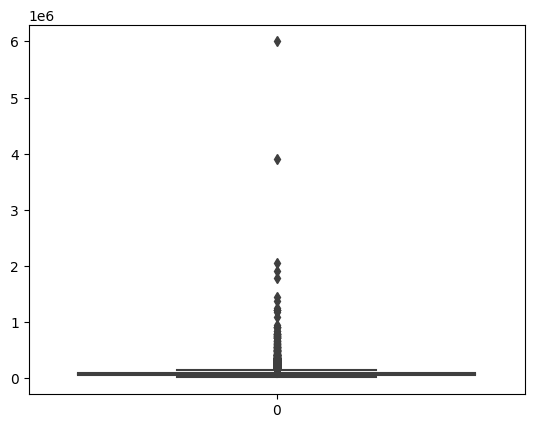

In [26]:
# Mostly there will be two columns which will have outliers 'annual_inc'  'loan_amnt'

# Plotting box plots for checking the outliers in annual_inc
sns.boxplot(df.annual_inc)

Clearly there are some outliers. We need to check from where the outliers are starting.

In [28]:
df.annual_inc.quantile([0.8, 0.9, 0.92, 0.95, 0.96, 0.97, 0.98, 0.99])

0.80     90000.0
0.90    116672.4
0.92    123996.0
0.95    142000.0
0.96    150000.0
0.97    166213.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64